In [1]:
!pip install yfinance

In [2]:
#import yfinance as yf
#df = yf.download('005930.KS','2021-06-03','2022-06-03')
#df.to_excel("삼성전자.xlsx")
#사이버캠퍼스로 대체

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Excel 파일을 pandas DataFrame으로 읽어옵니다.
data = pd.read_csv('C:/Users/7kingdom/Downloads/train.csv')



In [5]:
data.columns

Index(['일자', '종목코드', '종목명', '거래량', '시가', '고가', '저가', '종가'], dtype='object')

In [6]:
data['종목코드']

0         A060310
1         A095570
2         A006840
3         A054620
4         A265520
           ...   
987995    A189980
987996    A000540
987997    A003280
987998    A037440
987999    A238490
Name: 종목코드, Length: 988000, dtype: object

In [7]:
df = data[data['종목코드'] == 'A006840']

df

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
2002,20210602,A006840,AK홀딩스,197787,34400,36650,34300,36450
4002,20210603,A006840,AK홀딩스,115028,36950,38050,36300,36300
6002,20210604,A006840,AK홀딩스,67125,36350,36500,35550,35900
8002,20210607,A006840,AK홀딩스,105486,35900,35900,34500,34800
...,...,...,...,...,...,...,...,...
978002,20230523,A006840,AK홀딩스,6741,20150,20300,19900,20000
980002,20230524,A006840,AK홀딩스,3288,20000,20350,19900,19970
982002,20230525,A006840,AK홀딩스,14341,19930,20050,19400,19650
984002,20230526,A006840,AK홀딩스,6583,19650,19790,19410,19410


In [8]:
df.shape

(494, 8)

In [9]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [10]:
dfx = df[['시가', '고가', '저가', '종가']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['종가']]
dfx = dfx[['시가', '고가', '저가']]

dfx

,시가,고가,저가
2,0.943580,0.908068,0.914683
2002,0.900778,0.947467,0.920635
4002,1.000000,1.000000,1.000000
6002,0.976654,0.941839,0.970238
8002,0.959144,0.919325,0.928571
...,...,...,...
978002,0.346304,0.333959,0.349206
980002,0.340467,0.335835,0.349206
982002,0.337743,0.324578,0.329365
984002,0.326848,0.314822,0.329762


In [11]:
dfx.describe()

,시가,고가,저가
count,494.000000,494.000000,494.000000
mean,0.360790,0.354231,0.358357
std,0.208086,0.201709,0.208193
min,0.000000,0.000000,0.000000
25%,0.202821,0.195122,0.198909
50%,0.320039,0.315009,0.318452
75%,0.481518,0.475610,0.479663
max,1.000000,1.000000,1.000000


In [12]:
dfy.head()

,종가
2,0.918812
2002,1.000000
4002,0.994059
6002,0.978218
8002,0.934653


In [13]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [14]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(484, 10, 3)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 10, 3), (160, 10, 3), (324, 1), (160, 1))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

<h2> RNN <h2>

In [17]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            480       
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam')

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/50
7/7 [==============================] - 2s 68ms/step - loss: 5.5517 - val_loss: 0.3718
Epoch 2/50
7/7 [==============================] - 0s 17ms/step - loss: 3.0704 - val_loss: 0.1939
Epoch 3/50
7/7 [==============================] - 0s 17ms/step - loss: 1.4715 - val_loss: 0.1099
Epoch 4/50
7/7 [==============================] - 0s 17ms/step - loss: 1.3611 - val_loss: 0.0595
Epoch 5/50
7/7 [==============================] - 0s 17ms/step - loss: 1.0524 - val_loss: 0.0311
Epoch 6/50
7/7 [==============================] - 0s 14ms/step - loss: 0.7676 - val_loss: 0.0172
Epoch 7/50
7/7 [==============================] - 0s 17ms/step - loss: 0.5946 - val_loss: 0.0106
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 0.4946 - val_loss: 0.0069
Epoch 9/50
7/7 [==============================] - 0s 14ms/step - loss: 0.4849 - val_loss: 0.0050
Epoch 10/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3997 - val_loss: 0.0043
Epoch 11/50
7/7 [============

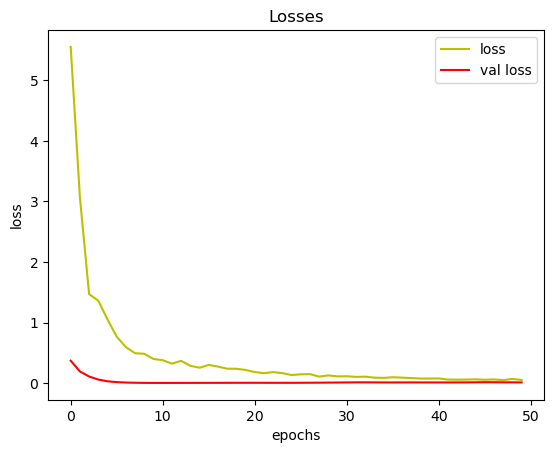

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


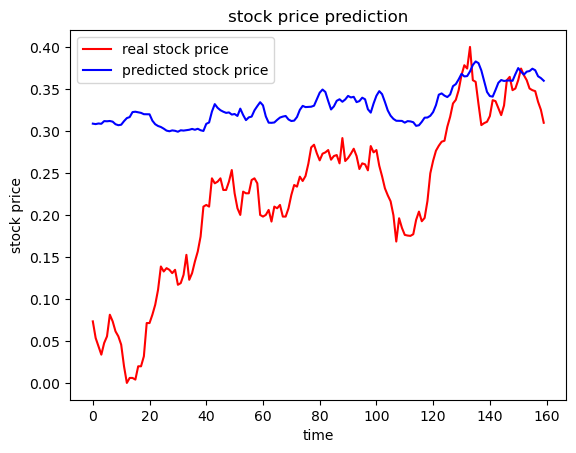

In [22]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

<h2> CNN <h2>

In [23]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.summary()

model.compile(loss='mse', optimizer='adam')


# 이하 동일한 코드


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             320       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [24]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/50
7/7 [==============================] - 2s 77ms/step - loss: 0.3646 - val_loss: 0.0224
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.1206 - val_loss: 0.0023
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0449 - val_loss: 0.0064
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0312 - val_loss: 0.0085
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0334 - val_loss: 0.0035
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0288 - val_loss: 0.0020
Epoch 7/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0334 - val_loss: 0.0024
Epoch 8/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0245 - val_loss: 0.0047
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0226 - val_loss: 0.0053
Epoch 10/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0192 - val_loss: 0.0038
Epoch 11/50
7/7 [============

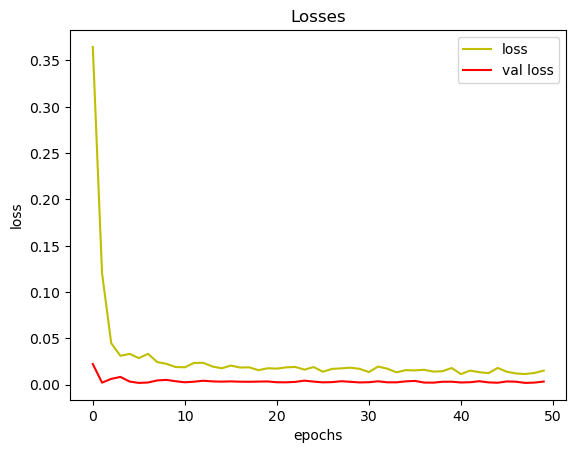

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


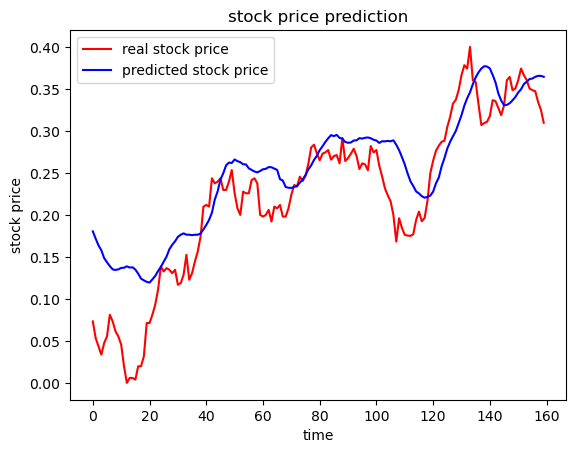

In [27]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()